# Decision Tree-2

You are a df scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dfset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dfset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow: 

### Q1. Import the dfset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [11]:
import pandas as pd 
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/piidus/data_science/main/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check Null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

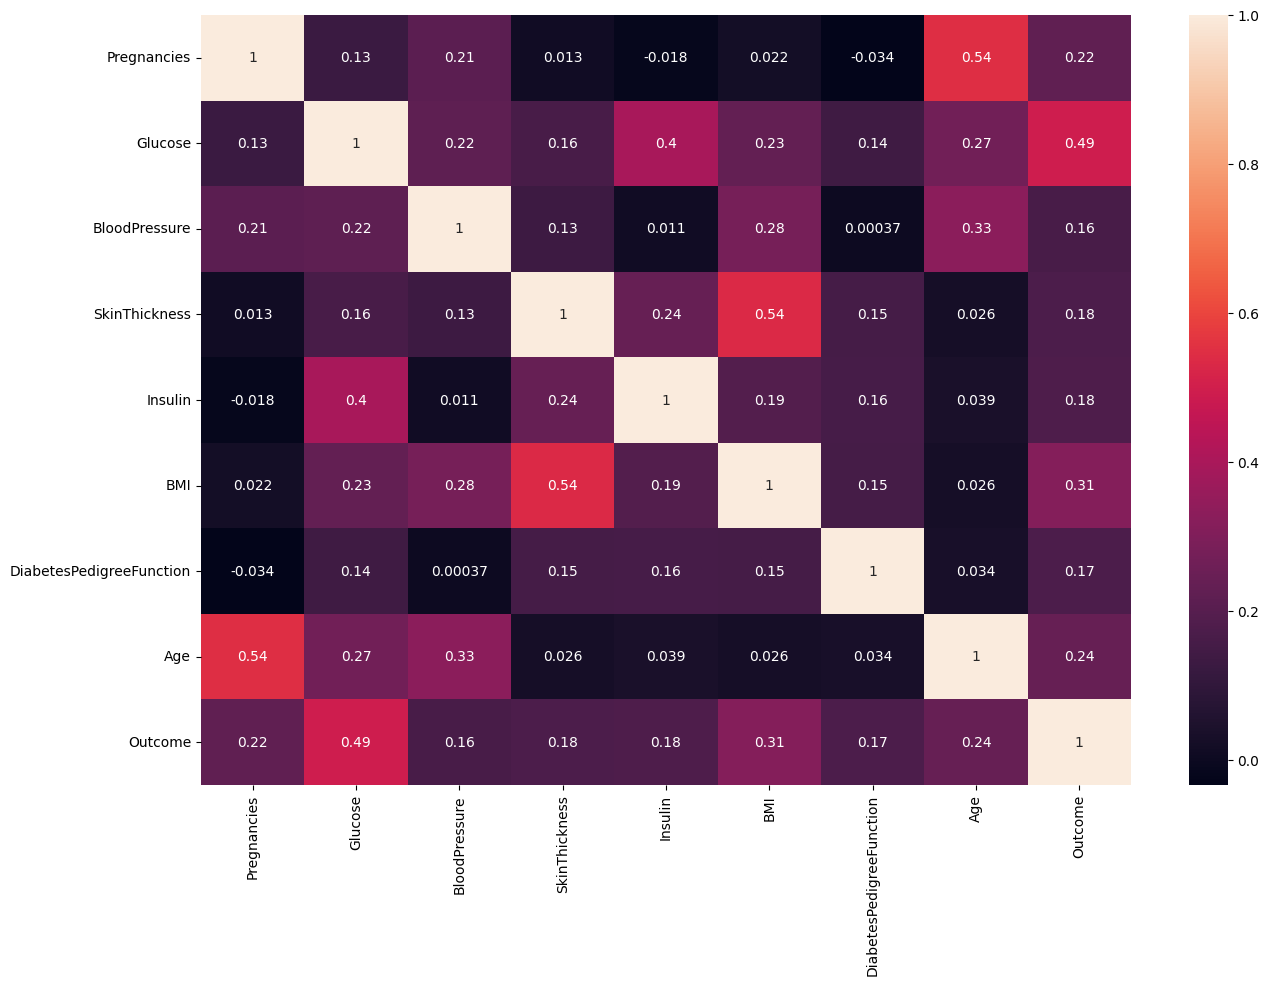

In [14]:
plot.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

### Q2. Preprocess the df by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

##### We can see there few df for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you  cando a quick search to see that one cannot have 0 values for these.
##### Let's deal with that. we can either remove such df or simply replace it with their respective mean values.

In [8]:
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

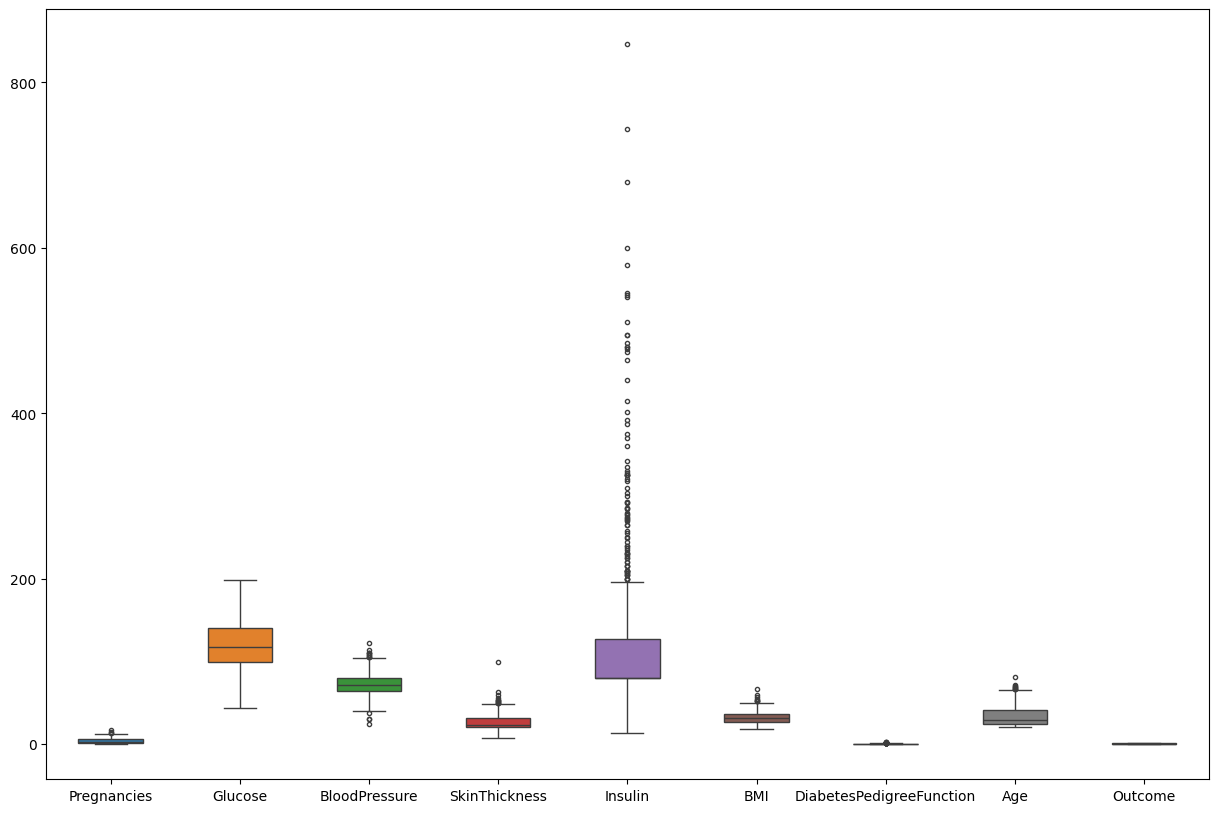

In [13]:
# Find out Outliar via visulization
fig, ax = plot.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [16]:
# Q3. Split the dfset into a training set and a test set. Use a random seed to ensure reproducibility.
# separate dataset into train and test
from sklearn.model_selection import train_test_split
#segregate the dependent and independent variable
X = df.drop(columns = ['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=32)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [18]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [21]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=4,scoring='accuracy')

In [22]:
## Train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
y_pred=clf.predict(X_test)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [26]:
score=accuracy_score(y_pred,y_test)
score

0.734375

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        94
           1       0.84      0.59      0.69        98

    accuracy                           0.73       192
   macro avg       0.76      0.74      0.73       192
weighted avg       0.76      0.73      0.73       192



### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [29]:
treeclassifier=DecisionTreeClassifier(criterion='gini',max_depth=5)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.48717948717948717, 0.9166666666666666, 'x[1] <= 127.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.25, 0.75, 'x[7] <= 28.5\ngini = 0.33\nsamples = 374\nvalue = [296, 78]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[5] <= 45.4\ngini = 0.146\nsamples = 214\nvalue = [197, 17]'),
 Text(0.10256410256410256, 0.4166666666666667, 'x[5] <= 30.95\ngini = 0.124\nsamples = 210\nvalue = [196, 14]'),
 Text(0.05128205128205128, 0.25, 'x[3] <= 13.5\ngini = 0.018\nsamples = 108\nvalue = [107, 1]'),
 Text(0.02564102564102564, 0.08333333333333333, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.15384615384615385, 0.25, 'x[6] <= 0.501\ngini = 0.222\nsamples = 102\nvalue = [89, 13]'),
 Text(0.1282051282051282, 0.08333333333333333, 'gini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(0.1794871794871795, 0.08333333333333333, 'gini = 0.368\nsamples = 37\nvalue = [28, 9]'),
 Tex

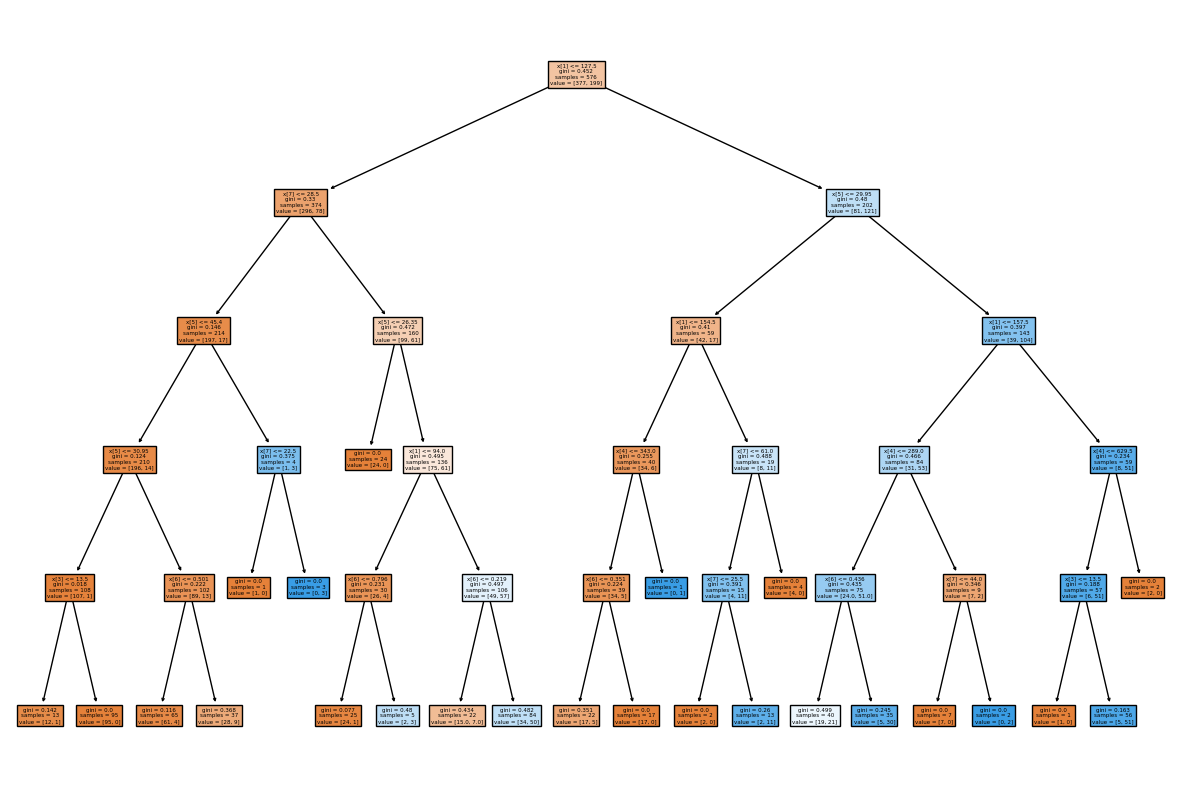

In [30]:
from sklearn import tree
plot.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

### Q7. Validate the decision tree model by applying it to new df or testing its robustness to changes in the dfset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [31]:
print(df.columns)
print(df.mean())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   3.845052
Glucose                     121.681605
BloodPressure                72.254807
SkinThickness                26.606479
Insulin                     118.660163
BMI                          32.450805
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [43]:
new_data = []
for i in df.columns:
    if i != 'Outcome':
        # print(i)
        try:
            x = float(input(f"Your {i} ::"))
            new_data.append(x)
            print(f"{i} :: {x}")
        except Exception as e:
            print(e)
print(new_data)

Pregnancies :: 5.0
Glucose :: 120.0
BloodPressure :: 72.0
SkinThickness :: 26.0
Insulin :: 100.0
BMI :: 32.0
DiabetesPedigreeFunction :: 0.0
Age :: 32.0
[5.0, 120.0, 72.0, 26.0, 100.0, 32.0, 0.0, 32.0]


In [44]:
new_data = [new_data]
new_data

[[5.0, 120.0, 72.0, 26.0, 100.0, 32.0, 0.0, 32.0]]

In [46]:
print(clf.predict(new_data))

[1]
